In [54]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []


In [3]:
for i in range(1,pages+1):
    print(f'scraping  page {i}')
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response=requests.get(url)
    content=response.content
    parsed_content=BeautifulSoup(content,'html.parser')
    review_cards=parsed_content.find_all('article',{'itemprop':'review'})
    for review in review_cards:
        title=review.find('h2',{'class':'text_header'}).text.strip()
        rating=review.find('span',{'itemprop':'ratingValue'}).text.strip()
        review_date=review.find('meta',{'itemprop':'datePublished'})['content']
        review_data=review.find('div',{'class':'text_content'}).text.strip()
        review_details = {
            'Title': title,
            'Rating': rating,
            'Review Date': review_date,
            'Text': review_data
            
        }
        reviews.append(review_details)
    print(f"--> {len(reviews)} total reviews")


scraping  page 1
--> 100 total reviews
scraping  page 2
--> 200 total reviews
scraping  page 3
--> 300 total reviews
scraping  page 4
--> 400 total reviews
scraping  page 5
--> 500 total reviews
scraping  page 6
--> 600 total reviews
scraping  page 7
--> 700 total reviews
scraping  page 8
--> 800 total reviews
scraping  page 9
--> 900 total reviews
scraping  page 10
--> 1000 total reviews


In [4]:
df=pd.DataFrame(reviews)

In [5]:
df

,Title,Rating,Review Date,Text
0,"""never fly this awful airline again""",1,2023-09-23,"✅ Trip Verified | I had a flight from Miami, F..."
1,"""I’ll never fly with them again""",1,2023-09-22,✅ Trip Verified | We started our day with BA ...
2,"""the worst of the worst""",1,2023-09-22,✅ Trip Verified | I fly British Airways weekl...
3,"""everyone refused to help us""",1,2023-09-20,Not Verified | Everything was ok until our co...
4,"""not a single feedback from British Airways""",1,2023-09-20,Not Verified | My initial flight was cancelle...
...,...,...,...,...
995,"""gesture of professionalism""",9,2018-11-30,✅ Trip Verified | Phoenix to Accra via London...
996,"""Not exactly best of British""",3,2018-11-30,✅ Trip Verified | Manchester to London. The b...
997,"""miserable customer service""",2,2018-11-28,✅ Trip Verified | San Diego to Hannover via L...
998,"""not offered any assistance""",1,2018-11-27,✅ Trip Verified | London Heathrow to Stuttgar...


In [6]:
df.head()

,Title,Rating,Review Date,Text
0,"""never fly this awful airline again""",1,2023-09-23,"✅ Trip Verified | I had a flight from Miami, F..."
1,"""I’ll never fly with them again""",1,2023-09-22,✅ Trip Verified | We started our day with BA ...
2,"""the worst of the worst""",1,2023-09-22,✅ Trip Verified | I fly British Airways weekl...
3,"""everyone refused to help us""",1,2023-09-20,Not Verified | Everything was ok until our co...
4,"""not a single feedback from British Airways""",1,2023-09-20,Not Verified | My initial flight was cancelle...


In [7]:
df.shape

(1000, 4)

In [8]:
df.isna().sum()

Title          0
Rating         0
Review Date    0
Text           0
dtype: int64

In [9]:
df['is_verified']=df['Text'].str.split('|').str.get(0)

In [10]:
df['reviews']=df['Text'].str.split('|').str.get(1)

In [11]:
df.head(5)

,Title,Rating,Review Date,Text,is_verified,reviews
0,"""never fly this awful airline again""",1,2023-09-23,"✅ Trip Verified | I had a flight from Miami, F...",✅ Trip Verified,"I had a flight from Miami, Florida to Dublin,..."
1,"""I’ll never fly with them again""",1,2023-09-22,✅ Trip Verified | We started our day with BA ...,✅ Trip Verified,We started our day with BA in Prague. The fl...
2,"""the worst of the worst""",1,2023-09-22,✅ Trip Verified | I fly British Airways weekl...,✅ Trip Verified,I fly British Airways weekly not because I w...
3,"""everyone refused to help us""",1,2023-09-20,Not Verified | Everything was ok until our co...,Not Verified,Everything was ok until our connecting fligh...
4,"""not a single feedback from British Airways""",1,2023-09-20,Not Verified | My initial flight was cancelle...,Not Verified,My initial flight was cancelled 8 hours prio...


In [12]:
df['is_verified'].value_counts()

✅ Trip Verified     791
Not Verified        207
❎ Not Verified        2
Name: is_verified, dtype: int64

In [13]:
df=df.drop(columns='Text',axis=1)

In [14]:
df.head(6)

,Title,Rating,Review Date,is_verified,reviews
0,"""never fly this awful airline again""",1,2023-09-23,✅ Trip Verified,"I had a flight from Miami, Florida to Dublin,..."
1,"""I’ll never fly with them again""",1,2023-09-22,✅ Trip Verified,We started our day with BA in Prague. The fl...
2,"""the worst of the worst""",1,2023-09-22,✅ Trip Verified,I fly British Airways weekly not because I w...
3,"""everyone refused to help us""",1,2023-09-20,Not Verified,Everything was ok until our connecting fligh...
4,"""not a single feedback from British Airways""",1,2023-09-20,Not Verified,My initial flight was cancelled 8 hours prio...
5,"""never fly British Airways again""",1,2023-09-19,Not Verified,We will never fly British Airways again. Our...


In [15]:
df.columns=df.columns.str.replace(' ','_')

In [16]:
df

,Title,Rating,Review_Date,is_verified,reviews
0,"""never fly this awful airline again""",1,2023-09-23,✅ Trip Verified,"I had a flight from Miami, Florida to Dublin,..."
1,"""I’ll never fly with them again""",1,2023-09-22,✅ Trip Verified,We started our day with BA in Prague. The fl...
2,"""the worst of the worst""",1,2023-09-22,✅ Trip Verified,I fly British Airways weekly not because I w...
3,"""everyone refused to help us""",1,2023-09-20,Not Verified,Everything was ok until our connecting fligh...
4,"""not a single feedback from British Airways""",1,2023-09-20,Not Verified,My initial flight was cancelled 8 hours prio...
...,...,...,...,...,...
995,"""gesture of professionalism""",9,2018-11-30,✅ Trip Verified,Phoenix to Accra via London. I had a great C...
996,"""Not exactly best of British""",3,2018-11-30,✅ Trip Verified,Manchester to London. The bag drop process t...
997,"""miserable customer service""",2,2018-11-28,✅ Trip Verified,San Diego to Hannover via London. I booked o...
998,"""not offered any assistance""",1,2018-11-27,✅ Trip Verified,London Heathrow to Stuttgart. Absolutely dis...


In [17]:
df['Title']=df['Title'].str.replace('"','')

In [18]:
df.head()

,Title,Rating,Review_Date,is_verified,reviews
0,never fly this awful airline again,1,2023-09-23,✅ Trip Verified,"I had a flight from Miami, Florida to Dublin,..."
1,I’ll never fly with them again,1,2023-09-22,✅ Trip Verified,We started our day with BA in Prague. The fl...
2,the worst of the worst,1,2023-09-22,✅ Trip Verified,I fly British Airways weekly not because I w...
3,everyone refused to help us,1,2023-09-20,Not Verified,Everything was ok until our connecting fligh...
4,not a single feedback from British Airways,1,2023-09-20,Not Verified,My initial flight was cancelled 8 hours prio...


In [19]:
df['is_verified']=df['is_verified'].str.replace('✅','')

In [20]:
df['is_verified'].value_counts()

 Trip Verified     791
Not Verified       207
❎ Not Verified       2
Name: is_verified, dtype: int64

In [21]:
#convert all the columns to lower case
df.columns=df.columns.str.lower()

In [22]:
df.head()

,title,rating,review_date,is_verified,reviews
0,never fly this awful airline again,1,2023-09-23,Trip Verified,"I had a flight from Miami, Florida to Dublin,..."
1,I’ll never fly with them again,1,2023-09-22,Trip Verified,We started our day with BA in Prague. The fl...
2,the worst of the worst,1,2023-09-22,Trip Verified,I fly British Airways weekly not because I w...
3,everyone refused to help us,1,2023-09-20,Not Verified,Everything was ok until our connecting fligh...
4,not a single feedback from British Airways,1,2023-09-20,Not Verified,My initial flight was cancelled 8 hours prio...


In [23]:
#df.to_csv('C:/Users/User/Desktop/Data Analytics projects dataset/british.csv')

In [24]:
print(df.dtypes)

title          object
rating         object
review_date    object
is_verified    object
reviews        object
dtype: object


In [25]:
df['review_date']=pd.to_datetime(df['review_date'])

In [26]:
df['year']=pd.to_datetime(df['review_date']).dt.year

In [27]:
df.head(5)

,title,rating,review_date,is_verified,reviews,year
0,never fly this awful airline again,1,2023-09-23,Trip Verified,"I had a flight from Miami, Florida to Dublin,...",2023
1,I’ll never fly with them again,1,2023-09-22,Trip Verified,We started our day with BA in Prague. The fl...,2023
2,the worst of the worst,1,2023-09-22,Trip Verified,I fly British Airways weekly not because I w...,2023
3,everyone refused to help us,1,2023-09-20,Not Verified,Everything was ok until our connecting fligh...,2023
4,not a single feedback from British Airways,1,2023-09-20,Not Verified,My initial flight was cancelled 8 hours prio...,2023


In [28]:
df['review_month']=pd.to_datetime(df['review_date']).dt.month

In [29]:
df['review_date'].dt.year.unique()

array([2023, 2022, 2021, 2020, 2019, 2018], dtype=int64)

In [30]:
df['rating'].dtypes

dtype('O')

In [31]:
df['rating'].isna().sum()

0

In [32]:
#create a monthly averaging rating
yearly_avg_ratings=df.groupby('year')['rating'].mean()

In [33]:
print(yearly_avg_ratings)

year
2018     2.903714e+31
2019              inf
2020    1.836639e+112
2021     2.291946e+90
2022    2.080368e+229
2023    5.291029e+218
Name: rating, dtype: float64


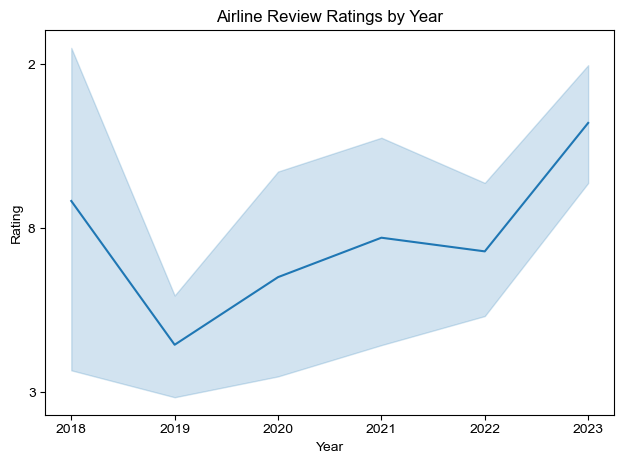

In [34]:
#plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(x='year',y='rating',data=df)
sns.set(style="whitegrid")
plt.title('Airline Review Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

In [35]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [36]:
sia=SentimentIntensityAnalyzer()

In [37]:
def get_sentiment(text):
    sentiment_scores=sia.polarity_scores(text)
    if sentiment_scores['compound']>=0.05:
        return 'Positive'
    elif sentiment_scores['compound']<=-0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [38]:
df['sentiment']=df['reviews'].apply(get_sentiment)

In [39]:
df.head(5)

,title,rating,review_date,is_verified,reviews,year,review_month,sentiment
0,never fly this awful airline again,1,2023-09-23,Trip Verified,"I had a flight from Miami, Florida to Dublin,...",2023,9,Negative
1,I’ll never fly with them again,1,2023-09-22,Trip Verified,We started our day with BA in Prague. The fl...,2023,9,Negative
2,the worst of the worst,1,2023-09-22,Trip Verified,I fly British Airways weekly not because I w...,2023,9,Negative
3,everyone refused to help us,1,2023-09-20,Not Verified,Everything was ok until our connecting fligh...,2023,9,Negative
4,not a single feedback from British Airways,1,2023-09-20,Not Verified,My initial flight was cancelled 8 hours prio...,2023,9,Negative


print('f')

In [40]:
df['sentiment'].value_counts(normalize=True)*100

Negative    49.4
Positive    49.2
Neutral      1.4
Name: sentiment, dtype: float64

In [41]:
yearly_sentiment=df.groupby('year')['sentiment'].value_counts(normalize=True)*100

In [42]:
print(yearly_sentiment)

year  sentiment
2018  Positive     56.666667
      Negative     43.333333
2019  Positive     56.179775
      Negative     42.977528
      Neutral       0.842697
2020  Positive     50.000000
      Negative     47.115385
      Neutral       2.884615
2021  Negative     50.574713
      Positive     47.126437
      Neutral       2.298851
2022  Positive     49.295775
      Negative     48.826291
      Neutral       1.877934
2023  Negative     62.380952
      Positive     36.666667
      Neutral       0.952381
Name: sentiment, dtype: float64


In [43]:
#verified accounts
df['is_verified'].value_counts(normalize=True)*100

 Trip Verified     79.1
Not Verified       20.7
❎ Not Verified      0.2
Name: is_verified, dtype: float64

In [44]:
#group by verified accounts
accounts=df.groupby('is_verified')['sentiment'].value_counts(normalize=True)*100
print(accounts)

is_verified      sentiment
 Trip Verified   Positive      49.683944
                 Negative      48.546144
                 Neutral        1.769912
Not Verified     Negative      52.173913
                 Positive      47.826087
❎ Not Verified   Negative     100.000000
Name: sentiment, dtype: float64


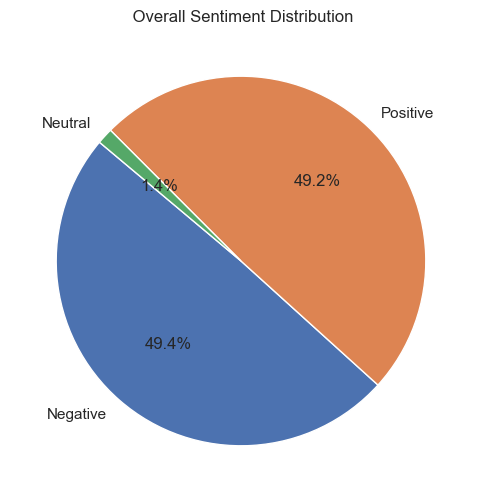

In [45]:
sentiments = ['Negative', 'Positive', 'Neutral']
percentages = [49.4, 49.2, 1.4]

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size (optional)
plt.pie(percentages, labels=sentiments, autopct='%1.1f%%', startangle=140)
plt.title(' Overall Sentiment Distribution')

# Display the pie chart
plt.show()

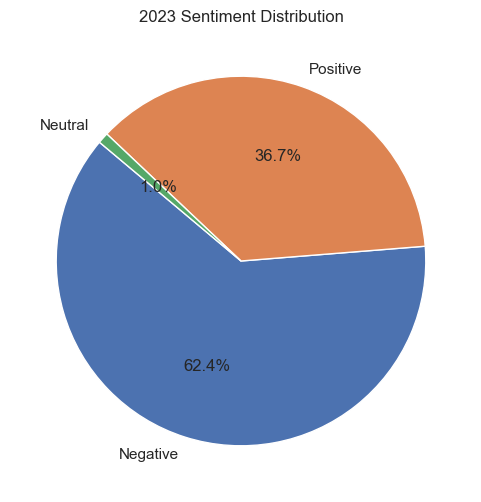

In [46]:
#sentiment in 2023
sentiments = ['Negative', 'Positive', 'Neutral']
percentages = [62.38, 36.66,  0.95]

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size (optional)
plt.pie(percentages, labels=sentiments, autopct='%1.1f%%', startangle=140)
plt.title('2023 Sentiment Distribution')

# Display the pie chart
plt.show()

In [62]:
#create a word cloud for the reviews
reviews=df['reviews']

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
#stop_words = set(stopwords.words('english'))

#stemmer = PorterStemmer()

In [64]:
all_reviews=''.join(reviews)

In [65]:
#words = nltk.word_tokenize(all_reviews)

In [66]:
#filtered_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]

In [67]:
#filtered_text = ' '.join(filtered_words)

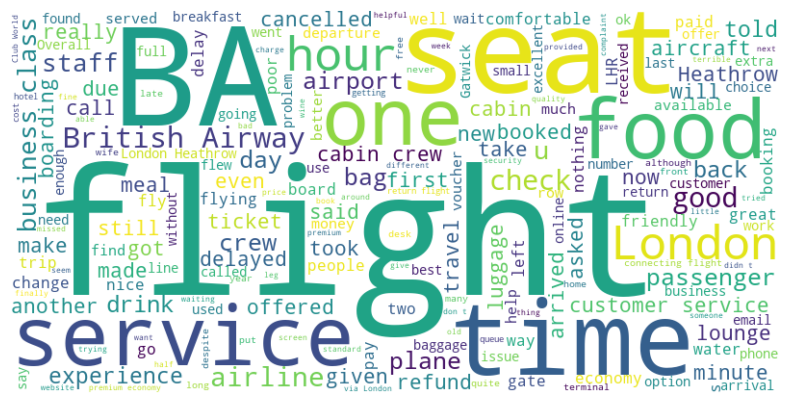

In [69]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()